In [60]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [70]:
root = os.getcwd() #get root path

In [71]:
df = pd.read_csv(root + '\dataset\\telkom_customer_16-01-2024.csv')
df.info() #check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
df.drop('customerID', axis=1, inplace=True)

In [74]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df = df[df["TotalCharges"]!= ' ']

In [81]:
df.iloc[488]

gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                       Yes
tenure                             1
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 74.35
TotalCharges                   74.35
Churn                            Yes
Name: 489, dtype: object

In [82]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [85]:
def unique_categorical_column(df):
    for column in df.columns:
        if df[column].dtypes == "object":
            print(f"{column} : {df[column].unique()}")

In [86]:
unique_categorical_column(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [87]:
df.replace(['No internet service', 'No phone service'], 'No', inplace=True)

In [88]:
unique_categorical_column(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [89]:
df.loc[:, df.columns != 'InternetService'] = df.loc[:, df.columns != 'InternetService'].replace({'Yes': 1, 'No': 0})
df = df.replace({'Male':1, 'Female': 0})


In [90]:
for column in df:
    print(f"{column} : {df[column].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [91]:
df.replace({'DSL': 1, 'Fiber optic': 2, 'No': 0}, inplace=True)
df.replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2}, inplace=True)
df.replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}, inplace=True)

In [92]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [93]:
scaler = MinMaxScaler()

numeric_column = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_column] = scaler.fit_transform(df[numeric_column])

In [94]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,1,0,1,0,0,0,0,0,1,0,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,1,1,0,1,0,0,0,1,0,1,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,1,1,1,0,0,0,0,0,1,1,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,1,1,0,1,1,0,0,1,0,2,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,2,0,0,0,0,0,0,0,1,0,0.521891,0.015330,1


In [95]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [96]:
X= df.drop('Churn', axis=1)
Y= df.Churn

In [97]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [98]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((5625, 19), (1407, 19), (5625,), (1407,))

In [117]:
input = tf.keras.Input(shape=(19,))
layer1 = tf.keras.layers.Dense(9, activation='relu')(input)
layer2 = tf.keras.layers.Dropout(0.2)(layer1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(layer2)

model = tf.keras.Model(inputs=input, outputs=output)

In [118]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(train_x, train_y, epochs=100, validation_data=(test_x, test_y))

Epoch 1/100
176/176 [==============================] - 2s 8ms/step - loss: 0.5547 - accuracy: 0.7218 - val_loss: 0.4911 - val_accuracy: 0.7342
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4806 - accuracy: 0.7337 - val_loss: 0.4635 - val_accuracy: 0.7349
Epoch 3/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4605 - accuracy: 0.7388 - val_loss: 0.4546 - val_accuracy: 0.7392
Epoch 4/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4510 - accuracy: 0.7646 - val_loss: 0.4478 - val_accuracy: 0.7740
Epoch 5/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4510 - accuracy: 0.7828 - val_loss: 0.4454 - val_accuracy: 0.7818
Epoch 6/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4473 - accuracy: 0.7860 - val_loss: 0.4441 - val_accuracy: 0.7846
Epoch 7/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4385 - accuracy: 0.7897 - val_loss: 0.4430 - val_accuracy: 0.7861

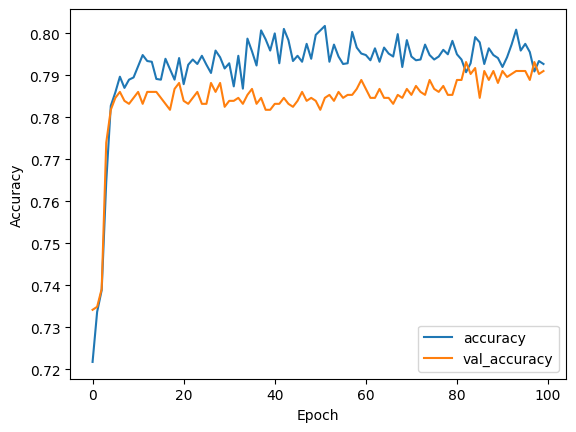

In [119]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

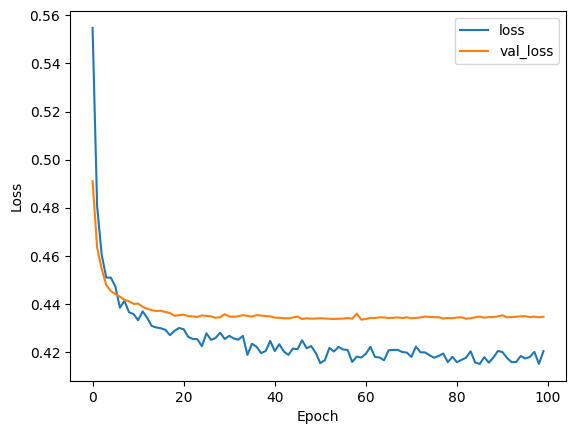

In [120]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [121]:
model.evaluate(test_x, test_y)

44/44 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.7910


[0.4346819221973419, 0.7910447716712952]

In [124]:
data = pd.DataFrame({
    'gender': 1,
    'SeniorCitizen': 1,
    'Partner': 1,
    'Dependents': 1,
    'tenure': 30,
    'PhoneService': 0,
    'MultipleLines': 0,
    'InternetService': 2,
    'OnlineSecurity': 1,
    'OnlineBackup': 1,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 1,
    'Contract': 0,
    'PaperlessBilling': 1,
    'PaymentMethod': 1,
    'MonthlyCharges': 95.64,
    'TotalCharges': 95.64
}, index=[0])

data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])
pred = model.predict(data)

if pred > 0.5:
    print('Churn')
else:
    print('Not Churn')


1/1 [==============================] - 0s 23ms/step
Churn
